In [3]:
import pandas as pd
import numpy as np

In [4]:
apr = pd.read_csv(r'/Users/jaimesastrecrespo/DAFT_1022/module_3/Project_week_8/uber-raw-data-apr14.csv')

In [5]:
apr.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [6]:
apr.dtypes

Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

In [7]:
from datetime import datetime

In [8]:
apr['Date/Time'].iloc[0]

'4/1/2014 0:11:00'

In [9]:
# call datetime.strptime to convert
# it into datetime datatype
datetime_obj = datetime.strptime(apr['Date/Time'].iloc[0], 
                                 "%m/%d/%Y %H:%M:%S")

  
# extract the time from datetime_obj
hours = datetime_obj.time().hour
print(hours)
apr['Hour'] = apr['Date/Time'].apply(lambda x: datetime.strptime(x, "%m/%d/%Y %H:%M:%S").time().hour)

0


In [10]:
apr.drop('Date/Time', axis=1, inplace=True)

In [11]:
del apr['Base']

In [12]:
apr.head()

,Lat,Lon,Hour
0,40.7690,-73.9549,0
1,40.7267,-74.0345,0
2,40.7316,-73.9873,0
3,40.7588,-73.9776,0
4,40.7594,-73.9722,0


In [13]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

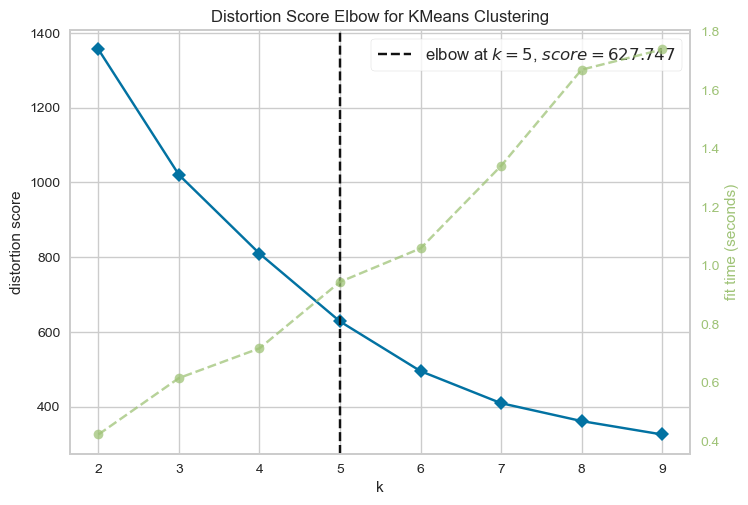

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
model = KMeans()
visualizer = KElbowVisualizer(estimator = model, k = (2,10))
visualizer.fit(apr[['Lat', 'Lon']])
visualizer.poof()

In [15]:
model = KMeans(6 , random_state= 42)
model.fit(apr[['Lat', 'Lon']])
y_pred = model.predict(apr[['Lat', 'Lon']])

In [16]:
np.unique(y_pred, return_counts=True)

(array([0, 1, 2, 3, 4, 5], dtype=int32),
 array([216680,  59915, 249523,  14407,  19134,   4857]))

In [17]:
model.cluster_centers_

array([[ 40.76556828, -73.97281182],
       [ 40.68856834, -73.96549626],
       [ 40.73111913, -73.9985994 ],
       [ 40.65951061, -73.77406315],
       [ 40.79807196, -73.86873733],
       [ 40.7005414 , -74.20167303]])

In [18]:
apr['Kcluster'] = model.labels_

In [19]:
apr.head()

,Lat,Lon,Hour,Kcluster
0,40.7690,-73.9549,0,0
1,40.7267,-74.0345,0,2
2,40.7316,-73.9873,0,2
3,40.7588,-73.9776,0,0
4,40.7594,-73.9722,0,0


In [20]:
# Let's sample

In [21]:
sample = apr.sample(frac = 0.02, random_state=42)

In [22]:
from sklearn import metrics

In [23]:
from sklearn.cluster import DBSCAN

In [24]:
for eps in np.round(np.arange(0.02, 0.03, 0.001),3):
    dbscan_cluster = DBSCAN(eps=eps)
    dbscan_cluster = dbscan_cluster.fit(sample[['Lat', 'Lon']])
    ypred = dbscan_cluster.fit_predict(sample[['Lat', 'Lon']])
    print("eps is:", eps)
    print("Score is:", metrics.silhouette_score(sample[['Lat', 'Lon']], ypred, metric="sqeuclidean"))

eps is: 0.02
Score is: 0.8140154635161284
eps is: 0.021
Score is: 0.8137883613995639
eps is: 0.022
Score is: 0.871267598044826
eps is: 0.023
Score is: 0.8578741148017804
eps is: 0.024
Score is: 0.870654259300429
eps is: 0.025
Score is: 0.8706084826481892
eps is: 0.026
Score is: 0.8122149756957635
eps is: 0.027
Score is: 0.8122149756957635
eps is: 0.028
Score is: 0.8120675265773107
eps is: 0.029
Score is: 0.8122120657239045


In [25]:
dbscan_cluster1 = DBSCAN(eps = 0.022)
dbscan_cluster1= dbscan_cluster1.fit(sample[['Lat', 'Lon']])
y_pred = dbscan_cluster1.fit_predict(sample[['Lat', 'Lon']])

In [26]:
sample['DBScluster'] = y_pred

In [27]:
sample.head()

,Lat,Lon,Hour,Kcluster,DBScluster
77202,40.8021,-73.9654,10,0,0
558915,40.6462,-73.7769,4,3,1
152635,40.7747,-73.9603,9,0,0
361259,40.7150,-74.0157,23,2,0
60087,40.7335,-74.0080,19,2,0


In [28]:
np.unique(y_pred, return_counts=True)

(array([-1,  0,  1,  2,  3]), array([   95, 10877,   233,    78,     7]))

In [29]:
centroids = []
for label in np.unique(y_pred):
    centroids.append([sample.loc[sample['DBScluster'] == label]['Lat'].mean(),sample.loc[sample['DBScluster'] == label]['Lon'].mean()])

In [30]:
centroids

[[40.80038210526316, -73.8871452631579],
 [40.74195362691927, -73.98028416842921],
 [40.64595579399146, -73.78402746781113],
 [40.692146153846174, -74.17964615384615],
 [40.734657142857145, -74.1626]]

In [31]:
from sklearn.mixture import GaussianMixture

In [32]:
gaussian_model = GaussianMixture(n_components=2)

# train the model
gaussian_model.fit(sample)

# assign each data point to a cluster
gaussian_result = gaussian_model.predict(sample)

sample['GMcluster'] = gaussian_result
print("Score is:", metrics.silhouette_score(sample[['Lat', 'Lon']], gaussian_result, metric="sqeuclidean"))

Score is: 0.848540996250925


In [33]:
import folium
from folium.plugins import HeatMap

In [34]:
map = folium.Map(location=(sample['Lat'].mean(), sample['Lon'].mean()), zoom_start=10)

# Create the Heat Map
HeatMap(list(zip(sample['Lat'], sample['Lon']))).add_to(map)

for point in model.cluster_centers_:
    folium.Marker(location=(point[0], point[1]), icon=folium.Icon(icon="car", prefix='fa', color='gray')).add_to(map)

for point in centroids:
    folium.Marker(location=(point[0], point[1]), icon=folium.Icon(icon="car", prefix='fa', color='pink')).add_to(map)

map

<AxesSubplot:xlabel='Kcluster', ylabel='Hour'>

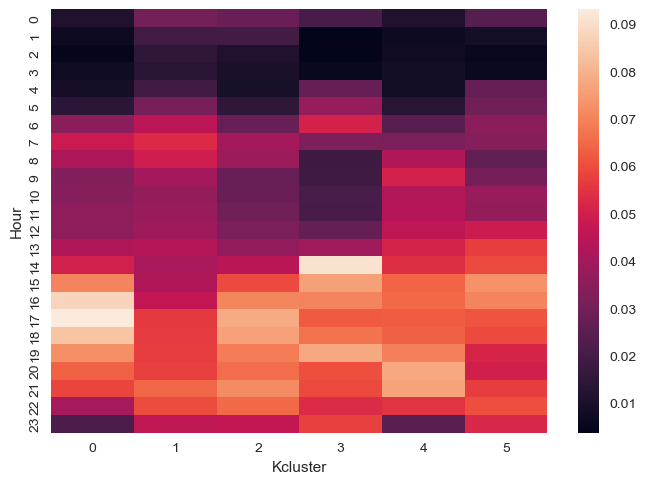

In [35]:
import seaborn as sns
sns.heatmap(pd.crosstab(apr.Hour, apr.Kcluster, normalize='columns'))

<AxesSubplot:xlabel='DBScluster', ylabel='Hour'>

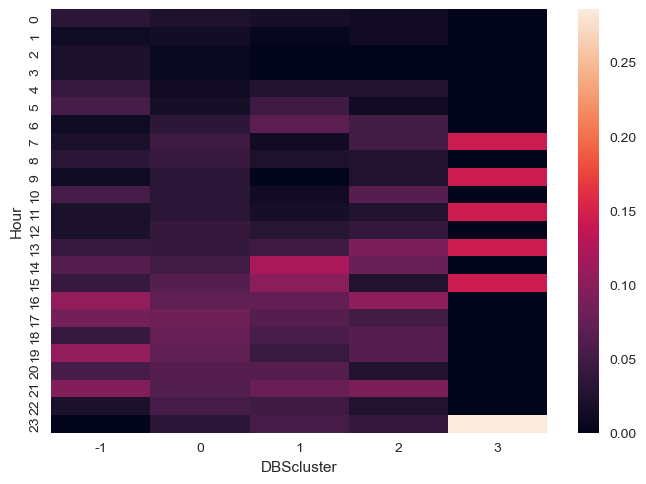

In [36]:
sns.heatmap(pd.crosstab(sample.Hour, sample['DBScluster'], normalize='columns'))

In [37]:
sep = pd.read_csv(r'/Users/jaimesastrecrespo/DAFT_1022/module_3/Project_week_8/uber-raw-data-sep14.csv')

In [38]:
samples = sep.sample(frac = 0.02, random_state=42)

In [39]:
map = folium.Map(location=(samples['Lat'].mean(), samples['Lon'].mean()), zoom_start=10)

# Create the Heat Map
HeatMap(list(zip(samples['Lat'], samples['Lon']))).add_to(map)

for point in model.cluster_centers_:
    folium.Marker(location=(point[0], point[1]), icon=folium.Icon(icon="car", prefix='fa', color='gray')).add_to(map)

for point in centroids:
    folium.Marker(location=(point[0], point[1]), icon=folium.Icon(icon="car", prefix='fa', color='pink')).add_to(map)

map

In [40]:
from sklearn.metrics import silhouette_score
from sklearn import metrics

In [44]:
print("Silhouette Coefficient for KMeans: %0.3f \n"
    % metrics.silhouette_score(sample[['Lat', 'Lon']], sample['Kcluster'], metric="sqeuclidean"))
print("Silhouette Coefficient for DBSCAN: %0.3f \n"
    % metrics.silhouette_score(sample[['Lat', 'Lon']], sample['DBScluster'], metric="sqeuclidean"))
print("Silhouette Coefficient for GM: %0.3f \n"
    % metrics.silhouette_score(sample[['Lat', 'Lon']], sample['GMcluster'], metric="sqeuclidean"))

Silhouette Coefficient for KMeans: 0.628 

Silhouette Coefficient for DBSCAN: 0.871 

Silhouette Coefficient for GM: 0.849 



In [45]:
print("Silhouette Coefficient for KMeans: %0.3f \n"
    % metrics.silhouette_score(samples[['Lat', 'Lon']], model.predict(samples[['Lat', 'Lon']]), metric="sqeuclidean"))
print("Silhouette Coefficient for DBSCAN: %0.3f \n"
    % metrics.silhouette_score(samples[['Lat', 'Lon']], dbscan_cluster1.fit_predict(samples[['Lat', 'Lon']]), metric="sqeuclidean"))


Silhouette Coefficient for KMeans: 0.551 

Silhouette Coefficient for DBSCAN: 0.769 

